# Task 01

* Name - Prohor -"PR"
* ID - 22299090 - '90'

Final - PR90

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

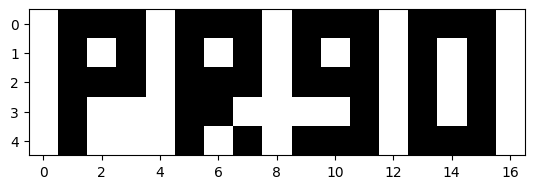

In [ ]:
task_one = np.array([[255,0,0,0,255,0,0,0,255,0,0,0,255,0,0,0,255],
                    [255,0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
                    [255,0,0,0,255,0,0,0,255,0,0,0,255,0,255,0,255],
                    [255,0,255,255,255,0,0,255,255,255,255,0,255,0,255,0,255],
                    [255,0,255,255,255,0,255,0,255,0,0,0,255,0,0,0,255]])
plt.imshow(task_one,cmap='gray')

# Task 02

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [ ]:
img01 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_01.jpg')
img02 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_02.jpg')
img03 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_03.jpg')
img04 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_04.jpg')
img05 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_05.jpg')
img06 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_06.jpg')
img07 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_07.jpg')
img08 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_08.jpg')
img09 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_09.jpg')
img10 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 2/ds_01_img_10.jpg')

images = [img01, img02, img03, img04, img05, img06, img07, img08, img09, img10]

In [ ]:
def image_transform(img):
  titles = ['Original', 'Resize','Flip','Translation','Crop','Stretch']
  image = []
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  print('Original Image')
  image.append(img)

  print('Transformation - 01')
  print('Resize')
  print('A model needs same size of images and resizing helps that cause')
  width = int(img.shape[1] * 5)
  height = int(img.shape[0] * 5)
  dim = (width, height)
  resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  image.append(resized_image)


  print('Transformation- 02')
  print('Flip')
  print('Flipping Horizontally will help to get different angle of the car from different left and right perspective')
  flipped_image = cv2.flip(img, 1)
  image.append(flipped_image)

  print('Transformation - 03')
  print('Translation')
  print('In real a world a car will not always be entered, By removing it from the center we can create a robust model')
  shift_x = 200
  shift_y = 150
  translation_matrix = np.float32([[1, 0, shift_x],
                                  [0, 1, shift_y]])
  translated_image = cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))
  image.append(translated_image)

  print('Transformation - 04')
  print('Crop')
  print('In real world scenario we will not always get a proper full image of a car, It may get cut off due to occulsion and zooming in')
  height,width = img.shape[:2]
  crop_h = int(height * np.random.uniform(.5, .9))
  crop_w = int(width * np.random.uniform(.5, .9))
  y1 = np.random.randint(0, height - crop_h + 1)
  x1 = np.random.randint(0, width - crop_w + 1)
  cropped_image = img[y1:y1 + crop_h, x1:x1 + crop_w]
  image.append(cropped_image)

  print('Transformation - 05')
  print('Strecth')
  print('In real life there can be distortion because of camera lense and hvae various aspect ratio')
  height, width = img.shape[:2]

  stretch_x = 2.5
  stretch_y = 1.5


  stretch_matrix = np.float32([
    [stretch_x, 0, 0],
    [0, stretch_y, 0]
  ])

  stretched_image = cv2.warpAffine(img, stretch_matrix, (int(width * stretch_x), int(height * stretch_y)))

  image.append(stretched_image)
  plt.figure(figsize=(15, 8))
  for i in range(len(image)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(image[i])
        plt.title(titles[i])
        plt.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
for i in images:
  image_transform(i)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

def random_noise(image):
  row,col,ch= image.shape
  prob = 0.05
  noisy_image = np.copy(image)
  num_salt = np.ceil(prob * image.size * 0.5).astype(int)
  num_pepper = np.ceil(prob * image.size * 0.5).astype(int)

  coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
  noisy_image[coords[0], coords[1]] = 255


  coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
  noisy_image[coords[0], coords[1]] = 0


  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB))

  plt.subplot(1, 2, 2)
  plt.title("Image with Random Noise")
  plt.imshow(cv2.cvtColor(noisy_image.astype(np.uint8), cv2.COLOR_BGR2RGB))

  plt.show()


In [ ]:
for i in images:
  random_noise(i)

Output hidden; open in https://colab.research.google.com to view.

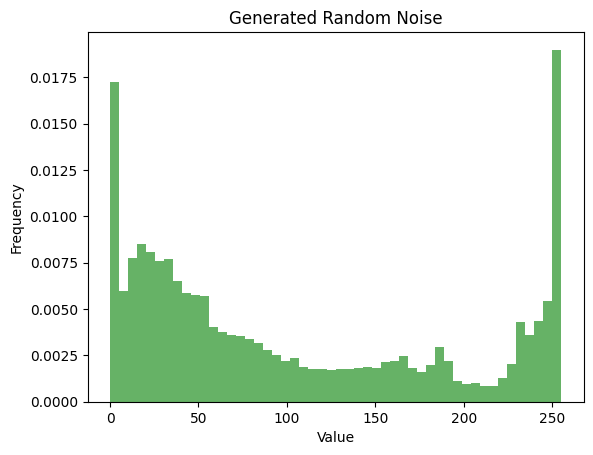

In [12]:
prob = 0.05
noisy_image = np.copy(img01)
num_salt = np.ceil(prob * img01.size * 0.5).astype(int)
num_pepper = np.ceil(prob * img01.size * 0.5).astype(int)

coords = [np.random.randint(0, i - 1, num_salt) for i in img01.shape]
noisy_image[coords[0], coords[1]] = 255


coords = [np.random.randint(0, i - 1, num_pepper) for i in img01.shape]
noisy_image[coords[0], coords[1]] = 0


flattened_noise = noisy_image.flatten()

# Plot the histogram of the generated Gaussian noise
plt.hist(flattened_noise, bins=50, density=True, alpha=0.6, color='g')
plt.title('Generated Random Noise')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Task 03


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
img01 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 3/ds_02_img_01.jpg')
img02 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 3/ds_02_img_02.jpg')
img03 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 3/ds_02_img_03.jpg')
img04 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 3/ds_02_img_04.jpg')
img05 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab1/Input/Task 3/ds_02_img_05.jpg')


images = [img01, img02, img03, img04, img05]

In [ ]:
def resizer(img):
  dim = (720,720)
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [ ]:
def blender(images):
  result = 0
  alpha = 0.2
  for i in images:
    result+= alpha*resizer(i)
  result = result.astype('uint8')
  plt.imshow(cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB))
  return result


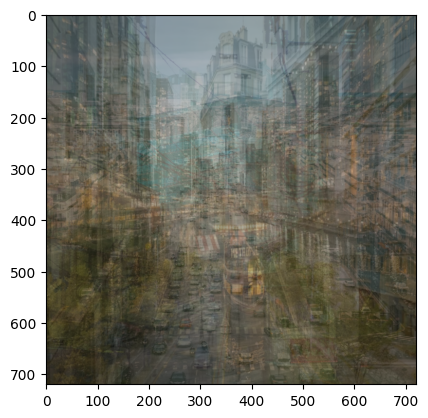

In [ ]:
final = blender(images)

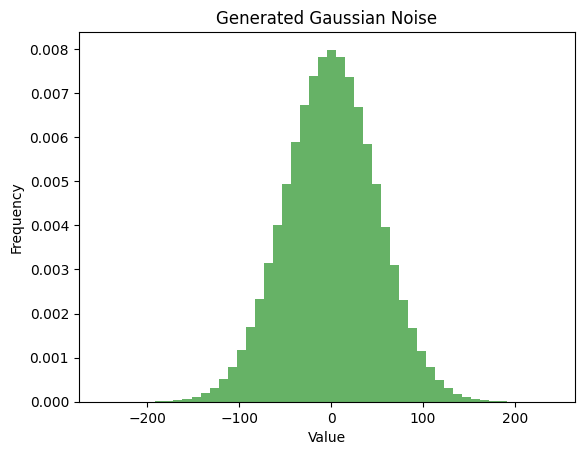

In [ ]:
gaussian_noise = np.random.randn(*final.shape) * 50


plt.hist(gaussian_noise.ravel(), bins=50, density=True, alpha=0.6, color='g')
plt.title('Generated Gaussian Noise')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


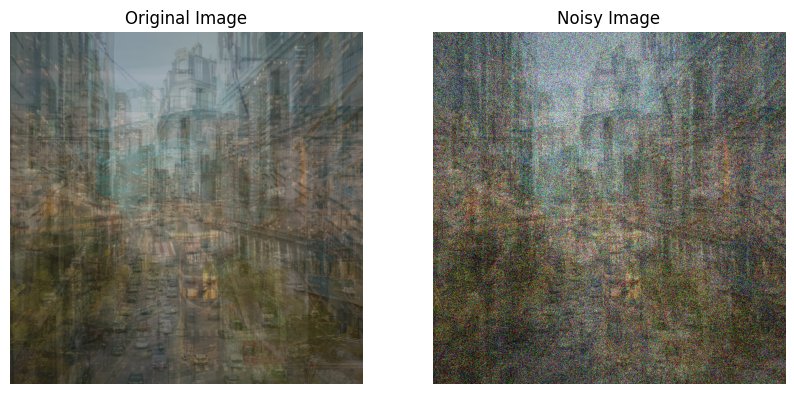

In [ ]:
output = final + gaussian_noise
output_uint8 = np.clip(output, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(output_uint8, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()